# Dates in timeseries models

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)

## Getting started

In [2]:
data = sm.datasets.sunspots.load()

Right now an annual date series must be datetimes at the end of the year.

In [3]:
from datetime import datetime
dates = pd.date_range('1700-1-1', periods=len(data.endog), freq="A-DEC")

## Using Pandas

Make a pandas TimeSeries or DataFrame

In [4]:
endog = pd.Series(data.endog, index=dates)

Instantiate the model

In [5]:
selection_res = ar_select_order(endog, 9, old_names=True, seasonal=True, period=11)
pandas_ar_res = selection_res.model.fit()

Out-of-sample prediction

In [6]:
pred = pandas_ar_res.predict(start='2005', end='2027')
print(pred)


2005-12-31    25.907501
2006-12-31    29.024373
2007-12-31    18.855729
2008-12-31    21.392012
2009-12-31    25.695092
2010-12-31    49.981886
2011-12-31    76.437566
2012-12-31    86.244709
2013-12-31    89.184663
2014-12-31    72.251362
2015-12-31    48.447259
2016-12-31    32.292122
2017-12-31    22.374099
2018-12-31    18.581657
2019-12-31    22.935657
2020-12-31    34.513168
2021-12-31    47.828469
2022-12-31    65.487766
2023-12-31    76.551575
2024-12-31    84.185043
2025-12-31    72.029019
2026-12-31    52.603134
2027-12-31    39.330875
Freq: A-DEC, dtype: float64


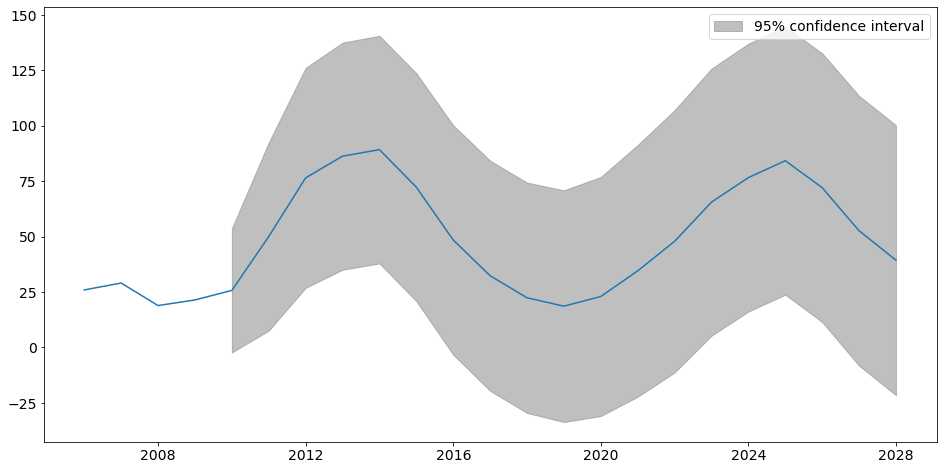

In [7]:
fig = pandas_ar_res.plot_predict(start='2005', end='2027')